# Learning Goals:
1. Whats differential privacy, how does it work, how can we use it off the shelf?
2. How to deploy python web-apps in matter of hours-MVP (flask, html, css, javascript, web-servers etc...)

# Differential privacy <-> quantify your privacy

a) What is it?

"Differential privacy is a strong, mathematical definition of privacy in the context of
statistical and machine learning analysis. "

Differential privacy is not a single tool, but rather a criterion, which many tools for analyzing
sensitive personal information have been devised to satisfy.

b) What does it achieve?

It provides a mathematically provable
guarantee of privacy protection against a wide range of privacy attacks, i.e., attempts to learn private
information specific to individuals from a data release. Privacy attacks include re-identification,
record linkage, and differencing attacks, but may also include other attacks currently unknown or
unforeseen.

c) Why is it called differential privacy?

Parameter epsilon (the difference between opting out of the computation using your personal data and not)
This parameter determines how much noise is added to the computation (in order to perserve privacy). It can be thought of as a
tuning knob for balancing privacy and accuracy. 

Epsilon of value Infinity is the standard model (no privacy preserved)
Epsilon towards 0 perserves more privacy but the accuracy suffers.

![alt text](diff_privacy.png "Title")

d) what is a real world example and implication of differential privacy and parameter epsilon? What can you guarantee with epsilon?

Differential privacy necessarily cannot eliminate privacy risk, it can guarantee that
the risk will be limited by quantitative bounds that depend on epsilon parameter. Lets see what this means on an example:
    
(Example is taken from https://privacytools.seas.harvard.edu/files/privacytools/files/pedagogical-document-dp_new.pdf)

Gertrude, a 65-year-old woman, is considering whether to participate in a medical
research study. While she can envision many potential personal and societal benefits resulting in part from her participation in the study, she is concerned that the personal information she discloses over the course of the study could lead to
an increase in her life insurance premium in the future.
For example, Gertrude is concerned that the tests she would undergo as part of the research study would reveal that she is predisposed to suffer a stroke and is significantly more likely to die in the coming year than the average person of
her age and gender. If such information related to Gertrude’s increased risk of
morbidity and mortality is discovered by her life insurance company, it will likely
increase her premium substantially.

Predicament is evident, but how can Gertrude hedge herself and still particepate in the study?

After all if the research study concludes that there is not substential  death risk for this group (lets say that conclusion is only 2%) BUT they do get to the Gertrudes private data, and this data indicates that there is a significant death risk, than her premium could be increased.


![alt text](gertrude.png "Title")

e) Notes about example:
1. her risk might increase even if her insurance company is not aware of her participation
2. Privacy risk accumulates with multiple analyses on an individual’s data--but its cummulative!

e) Ok how does it actually work?

Construction of differentially private analyses relies on the careful introduction of uncertainty in the form of random noise
all while perserving privacy.

Consult Appendix A in Harvard summary document. https://privacytools.seas.harvard.edu/files/privacytools/files/pedagogical-document-dp_new.pdf

Another good introduction behind the scenes https://medium.com/secure-and-private-ai-writing-challenge/differential-privacy-e5c7b933ef9e

Off the shelf algorithms and tools to build your own differentially privaty algortihms https://github.com/IBM/differential-privacy-library

# Model anything with weather

Steps:

1. Make your own train set (very fast with naive-bayes).
2. Take future information about weather (via API).
3. Incorporate it in a webapp to make predictions about ANY topic you want (that can be predicted with weather).

# Concrete: Will I be able to go on a road trip tomorrow or not?

Note: make sure that the requirements_jupyter.txt is in the same folder as this notebook.

In [1]:
!pip3 install -r requirements_jupyter.txt

In [2]:
!pip install numpy==1.16.1 --user

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [4]:
column_names = ['Outlook', 'Temperature_Numeric', 'Temperature_Nominal', 'Humidity_Numeric', 'Humidity_Nominal', 'Windy', 'Road_Trip']

weather_dataset = [['overcast',83,'hot',86,'high',False,True],
['overcast',64,'cool',65,'normal',True,True],
['overcast',72,'mild',90,'high',True,True],
['overcast',81,'hot',75,'normal',False,True],
['rainy',70,'mild',96,'high',False,True],
['rainy',68,'cool',80,'normal',False,True],
['rainy',65,'cool',70,'normal',True,False],
['rainy',75,'mild',80,'normal',False,True],
['rainy',71,'mild',91,'high',True,False],
['sunny',85,'hot',85,'high',False,False],
['sunny',80,'hot',90,'high',True,False],
['sunny',72,'mild',95,'high',False,False],
['sunny',69,'cool',70,'normal',False,True],
['sunny',75,'mild',70,'normal',True,True]]

#to Pandas DataFrame
train_df = pd.DataFrame(weather_dataset, columns=column_names)
train_df[['Windy','Road_Trip']] = train_df[['Windy','Road_Trip']].astype(int)
 

## Explore Data

In [5]:
train_df

,Outlook,Temperature_Numeric,Temperature_Nominal,Humidity_Numeric,Humidity_Nominal,Windy,Road_Trip
0,overcast,83,hot,86,high,0,1
1,overcast,64,cool,65,normal,1,1
2,overcast,72,mild,90,high,1,1
3,overcast,81,hot,75,normal,0,1
4,rainy,70,mild,96,high,0,1
5,rainy,68,cool,80,normal,0,1
6,rainy,65,cool,70,normal,1,0
7,rainy,75,mild,80,normal,0,1
8,rainy,71,mild,91,high,1,0
9,sunny,85,hot,85,high,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
Outlook                14 non-null object
Temperature_Numeric    14 non-null int64
Temperature_Nominal    14 non-null object
Humidity_Numeric       14 non-null int64
Humidity_Nominal       14 non-null object
Windy                  14 non-null int32
Road_Trip              14 non-null int32
dtypes: int32(2), int64(2), object(3)
memory usage: 800.0+ bytes


In [7]:
train_df.describe()

,Temperature_Numeric,Humidity_Numeric,Windy,Road_Trip
count,14.000000,14.000000,14.000000,14.000000
mean,73.571429,81.642857,0.428571,0.642857
std,6.571667,10.285218,0.513553,0.497245
min,64.000000,65.000000,0.000000,0.000000
25%,69.250000,71.250000,0.000000,0.000000
50%,72.000000,82.500000,0.000000,1.000000
75%,78.750000,90.000000,1.000000,1.000000
max,85.000000,96.000000,1.000000,1.000000


## Binarize/Dummify Categorical Data

In [8]:
train_df.columns


Index(['Outlook', 'Temperature_Numeric', 'Temperature_Nominal',
       'Humidity_Numeric', 'Humidity_Nominal', 'Windy', 'Road_Trip'],
      dtype='object')

In [9]:
def prepare_data_for_model(raw_dataframe, target_columns, drop_first = False, make_na_col = False):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# create dummy features 
train_df_ready = prepare_data_for_model(train_df, target_columns=['Outlook', 'Temperature_Nominal', 'Humidity_Nominal'])
train_df_ready = train_df_ready.dropna() 
train_df_ready.head()

,Temperature_Numeric,Humidity_Numeric,Windy,Road_Trip,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,83,86,0,1,1,0,0,0,1,0,1,0
1,64,65,1,1,1,0,0,1,0,0,0,1
2,72,90,1,1,1,0,0,0,0,1,1,0
3,81,75,0,1,1,0,0,0,1,0,0,1
4,70,96,0,1,0,1,0,0,0,1,1,0


# Modeling With Naive Bayes Classifiction

In [10]:
features = [feat for feat in list(train_df_ready) if feat != 'Road_Trip']

naive_bayes = GaussianNB()
naive_bayes.fit(train_df_ready[features], np.ravel(train_df_ready[['Road_Trip']]))

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(train_df_ready[features], 
                                                 train_df_ready[['Road_Trip']], 
                                                 test_size=0.5, 
                                                 random_state=42)
print(X_train.head(3))
print ('Accuracy: %f' % naive_bayes.score(X_test,y_test))

    Temperature_Numeric  Humidity_Numeric  Windy  Outlook_overcast  \
1                    64                65      1                 1   
13                   75                70      1                 0   
4                    70                96      0                 0   

    Outlook_rainy  Outlook_sunny  Temperature_Nominal_cool  \
1               0              0                         1   
13              0              1                         0   
4               1              0                         0   

    Temperature_Nominal_hot  Temperature_Nominal_mild  Humidity_Nominal_high  \
1                         0                         0                      0   
13                        0                         1                      0   
4                         0                         1                      1   

    Humidity_Nominal_normal  
1                         1  
13                        1  
4                         0  
Accuracy: 0.714286


## Differentially private naive bayes

In [11]:
import diffprivlib.models as models

In [12]:
clf = models.GaussianNB()
clf.fit(X_train, y_train)

C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:93: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(bounds=[(64, 81), (65, 96), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),
                   (0, 1), (0, 1), (0, 1), (0, 1)],
           epsilon=1, priors=None, var_smoothing=1e-09)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]
accuracy = list()

for epsilon in epsilons:
    clf = models.GaussianNB(epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:93: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:93: 

<Figure size 640x480 with 1 Axes>

In [14]:
# Predictions
print(naive_bayes.predict(X_test))

[0 0 1 0 0 0 1]


In [15]:
# Probabilites 
print(naive_bayes.predict_proba(X_test))

[[9.99994910e-01 5.09005696e-06]
 [9.99968916e-01 3.10842486e-05]
 [0.00000000e+00 1.00000000e+00]
 [8.84570501e-01 1.15429499e-01]
 [8.00907988e-01 1.99092012e-01]
 [9.99932094e-01 6.79055800e-05]
 [0.00000000e+00 1.00000000e+00]]


In [16]:
# how about predicting on new data?
future_golf_data = pd.DataFrame([[85,40,0,0,0,1,0,0,1,0,1]], columns=features)
future_golf_data.head()


,Temperature_Numeric,Humidity_Numeric,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,85,40,0,0,0,1,0,0,1,0,1


In [17]:
print("Will I Golf Tomorrow? %s" % bool(naive_bayes.predict(future_golf_data.head(1))[0]))

Will I Golf Tomorrow? True


# Pulling In Live Weather Data From OpenWeatherMap

In [18]:
# bring in real weather data using openweathermap and json.load
from urllib.request import urlopen
import json
YOUR_OPENWEATHERMAP_API_KEY = '7940fa88f265d6334c84e901f9555e34'
weather_json = json.load(urlopen("http://api.openweathermap.org/data/2.5/weather?q=Barcelona&appid=" + YOUR_OPENWEATHERMAP_API_KEY))
weather_json


{'coord': {'lon': 2.16, 'lat': 41.39},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 284.81,
  'feels_like': 278.85,
  'temp_min': 282.59,
  'temp_max': 285.93,
  'pressure': 1013,
  'humidity': 76},
 'visibility': 8000,
 'wind': {'speed': 7.7, 'deg': 60},
 'rain': {'1h': 0.51},
 'clouds': {'all': 75},
 'dt': 1585665916,
 'sys': {'type': 1,
  'id': 6398,
  'country': 'ES',
  'sunrise': 1585632930,
  'sunset': 1585678501},
 'timezone': 7200,
 'id': 3128760,
 'name': 'Barcelona',
 'cod': 200}

In [19]:
# access individual sections
weather_json['main']

{'temp': 284.81,
 'feels_like': 278.85,
 'temp_min': 282.59,
 'temp_max': 285.93,
 'pressure': 1013,
 'humidity': 76}

## Extracting Forecast Data

In [20]:
selected_location = "Seattle"
openweathermap_url = "http://api.openweathermap.org/data/2.5/forecast?q=" + selected_location + "&APPID=" + YOUR_OPENWEATHERMAP_API_KEY
from urllib.request import urlopen
import json
weather_json = json.load(urlopen(openweathermap_url))


# finding the right times - locate first 6AM instance
time_stamp_start = 0
len(weather_json['list'])
for forc in range(len(weather_json['list'])):
    time_stamp = weather_json['list'][forc]['dt_txt']
    if time_stamp.split()[1] == "06:00:00":
        time_stamp_start = forc  
        break;


In [21]:
# 6 AM next day
weather_json['list'][time_stamp_start]

{'dt': 1585720800,
 'main': {'temp': 277.53,
  'feels_like': 275.42,
  'temp_min': 277.53,
  'temp_max': 277.53,
  'pressure': 1018,
  'sea_level': 1018,
  'grnd_level': 1008,
  'humidity': 88,
  'temp_kf': 0},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'clouds': {'all': 100},
 'wind': {'speed': 0.76, 'deg': 182},
 'rain': {'3h': 1.05},
 'sys': {'pod': 'n'},
 'dt_txt': '2020-04-01 06:00:00'}

In [22]:
# 12 PM next day
weather_json['list'][time_stamp_start+2]

{'dt': 1585742400,
 'main': {'temp': 276.52,
  'feels_like': 274.5,
  'temp_min': 276.52,
  'temp_max': 276.52,
  'pressure': 1018,
  'sea_level': 1018,
  'grnd_level': 1008,
  'humidity': 92,
  'temp_kf': 0},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'},
  {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}],
 'clouds': {'all': 100},
 'wind': {'speed': 0.54, 'deg': 194},
 'rain': {'3h': 0.57},
 'snow': {'3h': 0.57},
 'sys': {'pod': 'n'},
 'dt_txt': '2020-04-01 12:00:00'}

## Translating Data From OpenWeatherMap to Golf|Weather Data

In [23]:
# get specifics for 12 PM
forecast_data = weather_json['list'][time_stamp_start+2]
forecast_data['main']['humidity']

92

In [24]:
forecast_data['weather'][0]['icon']

'10n'

In [25]:
forecast_data['wind']['speed']

0.54

In [26]:
forecast_data

{'dt': 1585742400,
 'main': {'temp': 276.52,
  'feels_like': 274.5,
  'temp_min': 276.52,
  'temp_max': 276.52,
  'pressure': 1018,
  'sea_level': 1018,
  'grnd_level': 1008,
  'humidity': 92,
  'temp_kf': 0},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'},
  {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}],
 'clouds': {'all': 100},
 'wind': {'speed': 0.54, 'deg': 194},
 'rain': {'3h': 0.57},
 'snow': {'3h': 0.57},
 'sys': {'pod': 'n'},
 'dt_txt': '2020-04-01 12:00:00'}

### Humidity

In [27]:
# humidity
def GetNominalHumidity(humidity_percent):
     if (humidity_percent > 80):
        return "high"
     else:
        return "normal"
    
humidity = forecast_data['main']['humidity']
print('humidity: %f' % humidity)
humidity_nominal = GetNominalHumidity(humidity)
print('humidity_nominal: %s' % humidity_nominal.capitalize())

humidity: 92.000000
humidity_nominal: High


### Temperature

In [28]:
# temperature
def GetNominalTemparature(temp_fahrenheit):
    if (temp_fahrenheit < 70):
        return "cool"
    elif (temp_fahrenheit < 80):
        return "mild"
    else:
        return "hot"
    
# temperature - to Fahrenheit and to nominal 
temperature = float(forecast_data['main']['temp']) * 1.8 - 459.67
print('temperature: %f Fahrenheit' % temperature)
temperature_nominal = GetNominalTemparature(temperature)
print('temperature_nominal: %s' % temperature_nominal.capitalize())

temperature: 38.066000 Fahrenheit
temperature_nominal: Cool


### Is Windy

In [29]:
def GetWindyBoolean(wind_meter_second):
    if (wind_meter_second > 10.8):
        return(True)
    else:
        return(False)
    
# wind speed 
iswindy = GetWindyBoolean(forecast_data['wind']['speed'])
print('iswindy: %s' % iswindy)

iswindy: False


### Outlook and icon

In [30]:
def GetWeatherOutlookAndWeatherIcon(main_weather_icon):
    # truncate third char - day or night not needed
    main_weather_icon = main_weather_icon[0:2]

    # return "Golf|Weather Data" variable and daytime icon
    if (main_weather_icon in ["01", "02"]):
        return("sunny", main_weather_icon + "d.png")
    elif (main_weather_icon in ["03", "04", 50]):
        return("overcast", main_weather_icon + "d.png")
    else:
        return("rain", main_weather_icon + "d.png")
    
# weather icon
outlook, outlook_icon = GetWeatherOutlookAndWeatherIcon(forecast_data['weather'][0]['icon'])
print('Outlook: %s' % outlook.capitalize())
 
            

Outlook: Rain


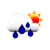

In [31]:
from IPython.core.display import Image, display
display(Image("http://openweathermap.org/img/w/" + outlook_icon, unconfined=True))

## Feeding in openweathermap data into the model

In [32]:
list(X_test)

['Temperature_Numeric',
 'Humidity_Numeric',
 'Windy',
 'Outlook_overcast',
 'Outlook_rainy',
 'Outlook_sunny',
 'Temperature_Nominal_cool',
 'Temperature_Nominal_hot',
 'Temperature_Nominal_mild',
 'Humidity_Nominal_high',
 'Humidity_Nominal_normal']

In [33]:
# get openweathermap data
selected_location = "portland"
openweathermap_url = "http://api.openweathermap.org/data/2.5/forecast?q=" + selected_location + "&APPID=" + YOUR_OPENWEATHERMAP_API_KEY
from urllib.request import urlopen
import json
weather_json = json.load(urlopen(openweathermap_url))


# find the right times - locate first 6AM instance
time_stamp_start = 0
len(weather_json['list'])
for forc in range(len(weather_json['list'])):
    time_stamp = weather_json['list'][forc]['dt_txt']
    if time_stamp.split()[1] == "06:00:00":
        time_stamp_start = forc  
        break;

#  6-9 AM = time_stamp_start
#  9-12 PM = time_stamp_start + 1
#  12-3 PM = time_stamp_start + 2
#  3-6 PM = time_stamp_start + 3
#  6-9 PM = time_stamp_start + 4
#  9-12 AM = time_stamp_start + 5
        
# get specifics for 12 PM
forecast_data = weather_json['list'][time_stamp_start+2]

# temperature - to Fahrenheit and to nominal 
temperature = float(forecast_data['main']['temp']) * 1.8 - 459.67
temperature_nominal = GetNominalTemparature(temperature)
humidity = forecast_data['main']['humidity']
humidity_nominal = GetNominalHumidity(humidity)
iswindy = GetWindyBoolean(forecast_data['wind']['speed'])
outlook, outlook_icon = GetWeatherOutlookAndWeatherIcon(forecast_data['weather'][0]['icon'])
 
Temperature_Numeric = temperature
Humidity_Numeric = humidity
Windy = int(iswindy)
Outlook_overcast = int(outlook=="overcast")
Outlook_rainy = int(outlook=="rainy")
Outlook_sunny = int(outlook=="sunny")

Temperature_Nominal_cool = int(temperature_nominal=="cool")
Temperature_Nominal_hot = int(temperature_nominal=="hot")
Temperature_Nominal_mild = int(temperature_nominal=="mild")
Humidity_Nominal_high = int(humidity_nominal=="high")
Humidity_Nominal_normal = int(humidity_nominal=="normal")

 
future_data = pd.DataFrame([[Temperature_Numeric,
 Humidity_Numeric,
 Windy,
 Outlook_overcast,
 Outlook_rainy,
 Outlook_sunny,
 Temperature_Nominal_cool,
 Temperature_Nominal_hot,
 Temperature_Nominal_mild,
 Humidity_Nominal_high,
 Humidity_Nominal_normal]], columns = list(X_test) )

future_data

,Temperature_Numeric,Humidity_Numeric,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,38.642,85,0,0,0,0,1,0,0,1,0


In [34]:

print(naive_bayes.predict_proba(future_data))
print(naive_bayes.predict(future_data))

[[9.99987692e-01 1.23081646e-05]]
[0]


In [35]:
prediction = naive_bayes.predict_proba(future_data)
print("There is a %f percent chance of going on a roadtrip tomorrow." % (prediction[0][1] * 100))

There is a 0.001231 percent chance of going on a roadtrip tomorrow.
